In [15]:
%matplotlib inline


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
calschool = pd.read_csv("carschool/Caschool.csv")


In [18]:
calschool.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [19]:
''' 1.1 Visualize the univariate distribution of the target feature and each of the three continuous
  
    explanatory variables that you think are likely to have a relationship with the target feature.

'''


' 1.1 Visualize the univariate distribution of the target feature and each of the three continuous\n  \n    explanatory variables that you think are likely to have a relationship with the target feature.\n\n'

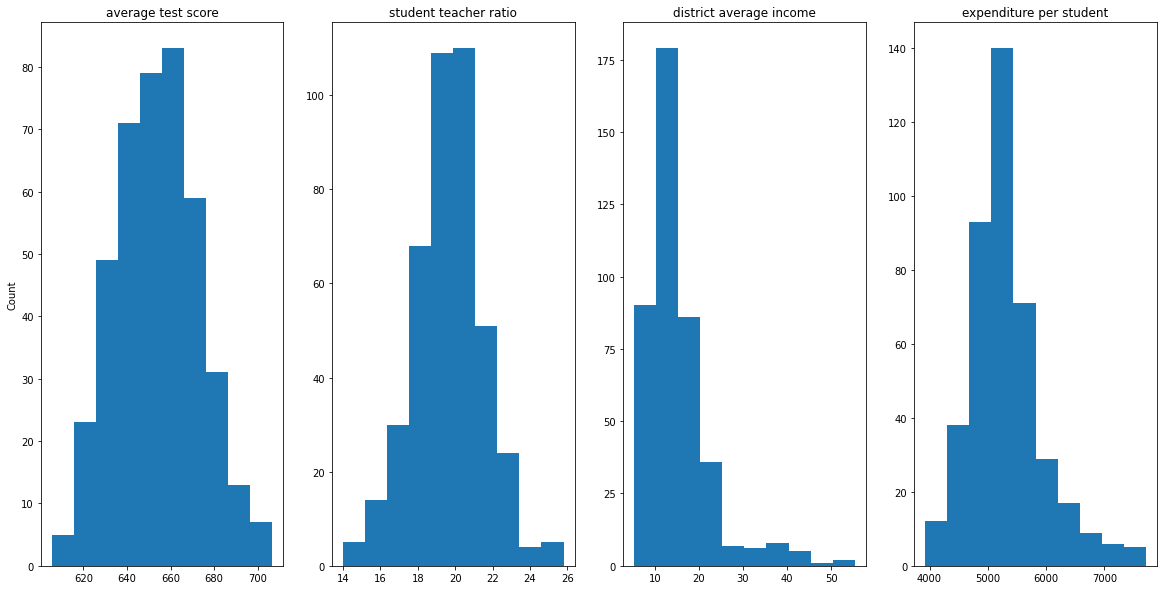

In [20]:
# https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Caschool.html

fig, ax = plt.subplots(1, 4, figsize = (20, 10))

ax[0].hist(calschool["testscr"])
ax[0].set_ylabel("Count")
ax[0].set_title("average test score")


ax[1].hist(calschool["str"])
ax[1].set_title("student teacher ratio")

ax[2].hist(calschool["avginc"])
ax[2].set_title("district average income")

ax[3].hist(calschool["expnstu"])
ax[3].set_title("expenditure per student")

plt.show()

In [21]:
''' 

1.2 Visualize the dependency of the target on each feature from 1.1.

'''

' \n\n1.2 Visualize the dependency of the target on each feature from 1.1.\n\n'

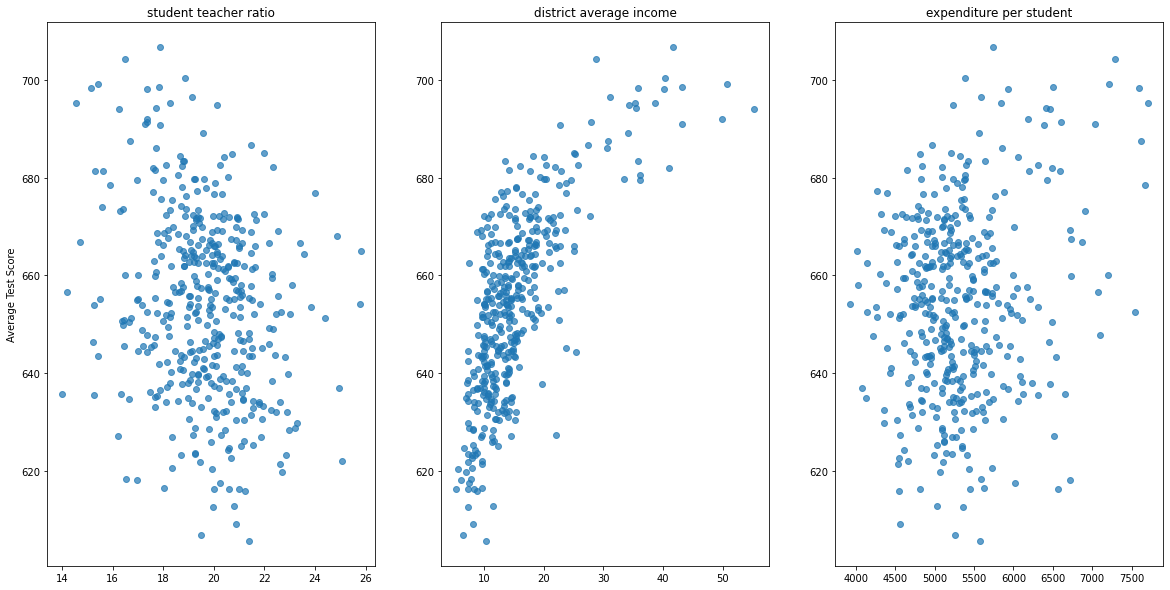

In [22]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))



ax[0].scatter(calschool["str"], calschool["testscr"], alpha = 0.7)
ax[0].set_ylabel("Average Test Score")
ax[0].set_title("student teacher ratio")

ax[1].scatter(calschool["avginc"], calschool["testscr"], alpha = 0.7)
ax[1].set_title("district average income")

ax[2].scatter(calschool["expnstu"], calschool["testscr"], alpha = 0.7)
ax[2].set_title("expenditure per student")

plt.show()